# Verificação de método de compressão para imagens Dicom
Adriano da Silva
Unicamp - FEEC - Pós-graduação - RA 262097

O objetivo deste caderno de notas é apresentar um método de compressão de imagens para ser aplicado em lâminas de resultados de exames de diagnósticos por imagem de duas diferentes técnicas, sendo tomografia computadorizada e ressonância magnética, desde que a perda de qualidade seja minimizada ao ponto de não interferir em uma análise clínica humana.

O motivo...

Para tal, utilizaremos algumas imagens públicas anonimizadas, bem como algorítimos de compressão e de comparação das perdas de qualidade em relação a imagem original.

O trecho de código abaixo exibe uma imagem Dicom, bem como algumas informações de cabeçalho do arquivo :

Uma referência: https://engineeringblog.yelp.com/2017/06/making-photos-smaller.html


Nome do arquivo      : ../data/000001_VBM_6min.dcm
Tipo de armazenamento: 1.2.840.10008.5.1.4.1.1.4.1
Nome do paciente     : , 
Identificação        : 
Modalidade           : MR
Data do estudo       : 20130202
Dimensões da imagem  : 240 x 240, 20736000 bytes
Local das lâminas    : (missing)
Slices...........: 180


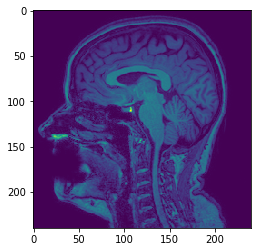

In [5]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
from matplotlib import pylab

arquivo='../data/000001_VBM_6min.dcm'
dados = pydicom.dcmread(arquivo)

nome = dados.PatientName
nomeCompleto = nome.family_name + ", " + nome.given_name

print("Nome do arquivo      :", arquivo)
print("Tipo de armazenamento:", dados.SOPClassUID)
print("Nome do paciente     :", nomeCompleto)
print("Identificação        :", dados.PatientID)
print("Modalidade           :", dados.Modality)
print("Data do estudo       :", dados.StudyDate)

if 'PixelData' in dataset:
    rows = int(dados.Rows)
    cols = int(dados.Columns)
    print("Dimensões da imagem  : {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dados.PixelData)))
    if 'PixelSpacing' in dados:
        print("Pixel spacing....:", dados.PixelSpacing)

print("Local das lâminas    :", dados.get('SliceLocation', "(missing)"))

laminas=dados.pixel_array

print("Slices...........:", len(laminas))

lamina=slices[int(len(laminas)/2)]
plt.imshow(lamina, interpolation='nearest')
plt.show()


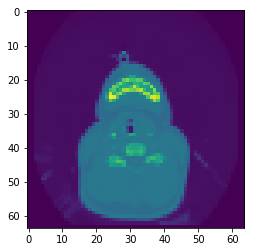

In [7]:
arquivo2='../data/CTHead10.dcm'
dados2 = pydicom.dcmread(arquivo2)
lamina2=dados2.pixel_array
plt.imshow(lamina2, interpolation='nearest')
plt.show()

